In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import array_to_latex, plot_state_qsphere, plot_bloch_multivector
from qiskit.extensions import Initialize

# Dense coding

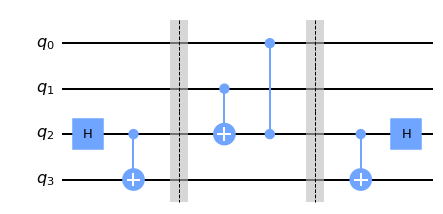

In [2]:
qc_dense_coding = QuantumCircuit(4)

# prepare the bell state
qc_dense_coding.h(2)
qc_dense_coding.cx(2, 3)
qc_dense_coding.barrier()

# encode the information
qc_dense_coding.cx(1, 2)
qc_dense_coding.cz(0, 2)
qc_dense_coding.barrier()

# measure in the bell basis
qc_dense_coding.cx(2, 3)
qc_dense_coding.h(2)

qc_dense_coding.draw('mpl')

In [3]:
def draw_qc_dense_coding_state(a, b):
    state_arr = np.zeros(2 ** 4)
    
    state_arr[0] = not a and not b
    state_arr[1] = not a and b
    state_arr[2] = a and not b
    state_arr[3] = a and b
    
    state = Statevector(state_arr)
    state = state.evolve(qc_dense_coding)
    
    return state.draw('qsphere')
    # return state.draw('latex') # popsute

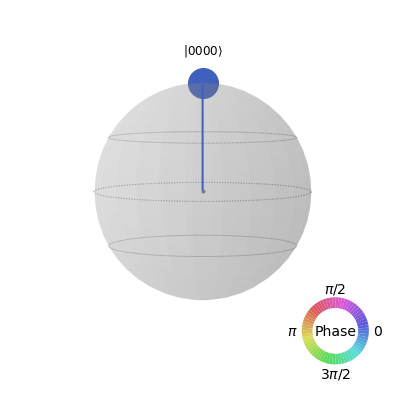

In [4]:
draw_qc_dense_coding_state(0, 0)

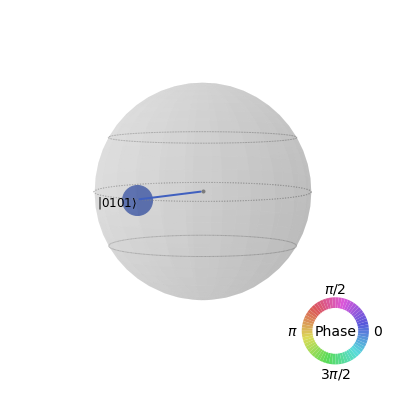

In [5]:
draw_qc_dense_coding_state(0, 1)

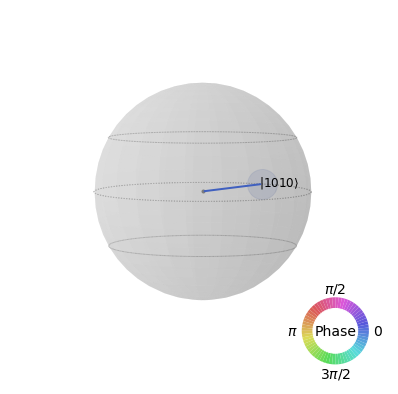

In [6]:
draw_qc_dense_coding_state(1, 0)

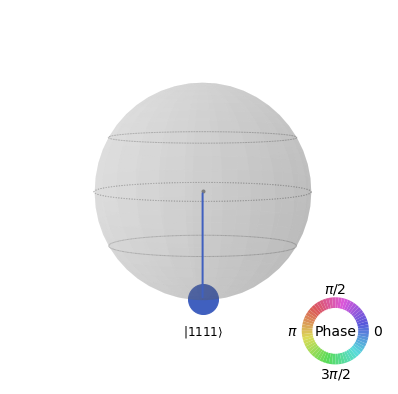

In [7]:
draw_qc_dense_coding_state(1, 1)

# Quantum teleporation

In [8]:
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))

<IPython.core.display.Latex object>

In [9]:
init_gate = Initialize(psi)

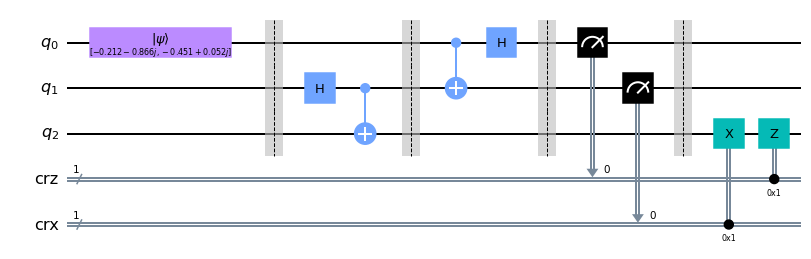

In [10]:
def get_qc_teleportation():
    qr = QuantumRegister(3, name='q')
    crz, crx = ClassicalRegister(1, name='crz'), ClassicalRegister(1, name='crx')

    qc_teleporation = QuantumCircuit(qr, crz, crx)

    # base state
    qc_teleporation.append(init_gate, [0])
    qc_teleporation.barrier()

    # prepare the bell state
    qc_teleporation.h(1)
    qc_teleporation.cx(1, 2)
    qc_teleporation.barrier()

    # encode the information
    qc_teleporation.cx(0, 1)
    qc_teleporation.h(0)
    qc_teleporation.barrier()

    # measure
    qc_teleporation.measure(0, 0)
    qc_teleporation.measure(1, 1)
    qc_teleporation.barrier()

    # correct the basis
    qc_teleporation.x(2).c_if(crx, 1)
    qc_teleporation.z(2).c_if(crz, 1)
    
    return qc_teleporation

get_qc_teleportation().draw('mpl')

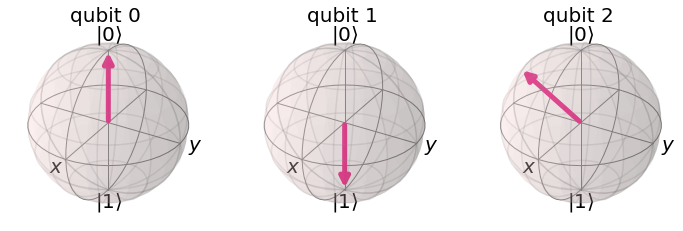

In [12]:
qc = get_qc_teleportation()
backend = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = backend.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

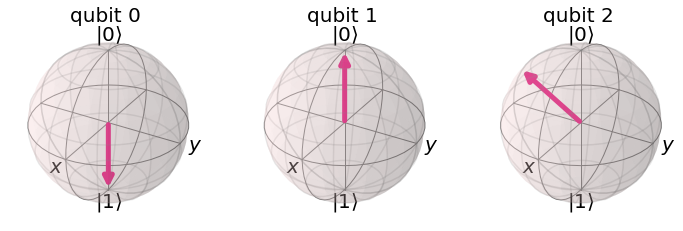

In [13]:
qc = get_qc_teleportation()
backend = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = backend.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)

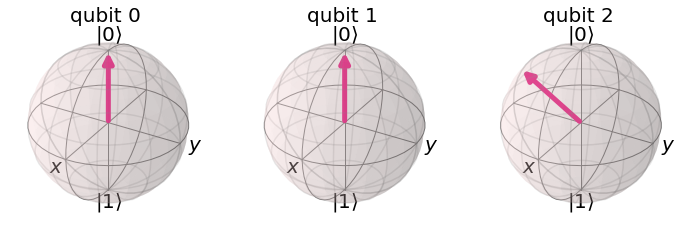

In [15]:
qc = get_qc_teleportation()
backend = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = backend.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)